<a href="https://colab.research.google.com/github/ValentineKarimi/The-titanic-dataset-/blob/main/KNN_Moringa_Week_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the Question
**a) Specifying the Question**

I have been recruited as an analyst to help provide the best model for prediction of those who survived and did not survive in the titanic dataset 

**b) Defining the Metric for Success**

Find the optimal Knn model to best predict survivers given their traits 

**c) Understanding the context**

Using Knn neighbours in machine learning. Depending on the features , accuracy score and confusion matrix, a good set should be choosen, so it is easier to predict which kind of people survived 

**d) Recording the Experimental Design**

Reading and Checking the Data

Exploratory Analysis

Tidying the Dataset

Feature engineering 

Implementing the solution 

Challenging the solution 

Follow-up questions


**e) Data Relevance**


One datasets is provided by the  company:

The dataset and glossary to use for this project can be found here Datasets

##Reading and Checking the Data

In [1]:
#Importing libraries 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#loading  train dataset
train_data = pd.read_csv('train.csv')
#loading test dataset
test_data = pd.read_csv('test.csv')

In [3]:
# Previewing the top and bottom part of the datasets
display("Train_data preview")
display(train_data.head(3))
display(train_data.tail(3))
display("Test_data preview")
display(test_data.head(3))
display(test_data.tail(3))

'Train_data preview'

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S

[3 rows x 12 columns]

PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[3 rows x 12 columns]

'Test_data preview'

PassengerId  Pclass                              Name  ...    Fare  Cabin  Embarked
0          892       3                  Kelly, Mr. James  ...  7.8292    NaN         Q
1          893       3  Wilkes, Mrs. James (Ellen Needs)  ...  7.0000    NaN         S
2          894       2         Myles, Mr. Thomas Francis  ...  9.6875    NaN         Q

[3 rows x 11 columns]

PassengerId  Pclass                          Name  ...     Fare  Cabin  Embarked
415         1307       3  Saether, Mr. Simon Sivertsen  ...   7.2500    NaN         S
416         1308       3           Ware, Mr. Frederick  ...   8.0500    NaN         S
417         1309       3      Peter, Master. Michael J  ...  22.3583    NaN         C

[3 rows x 11 columns]

In [4]:

# Check The number of records in  train dataset
print('Train_data dataset has ',train_data.shape[0],'records and ',train_data.shape[1], 'rows' )

# Check The number of records in dataset
print('Test_data dataset has ',test_data.shape[0],'records and ',test_data.shape[1], 'rows' )

Train_data dataset has  891 records and  12 rows
Test_data dataset has  418 records and  11 rows


In [5]:
# Check  information on datatypes of datasets 
display("Information on train_data data types and number of none null values")
display(train_data.info())
#Checking the columns in datasets
display("Train_data columns")
display(train_data.columns)
display("Information on test_data data types and number of none null values")
display(test_data.info())
#Checking the columns in datasets
display("Test_data columns")
display(test_data.columns)

'Information on train_data data types and number of none null values'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

'Train_data columns'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'Information on test_data data types and number of none null values'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

'Test_data columns'

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Find unique values of each dataset  
print(train_data.nunique())
print(test_data.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [7]:
#Check the unique values on each column in train dataset
for column in train_data.columns:
  print(column)
  
  print(train_data[column].unique())
  print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [8]:
#Check the unique values on each column in test_data dataset
for column in test_data.columns:
  print(column)
  
  print(test_data[column].unique())
  print('\n')

PassengerId
[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086

##Tidying the dataset 

In [9]:
### lets now check for duplicates in our dataset
print(train_data.duplicated().value_counts())
print(test_data.duplicated().value_counts())

False    891
dtype: int64
False    418
dtype: int64


No duplicates found 

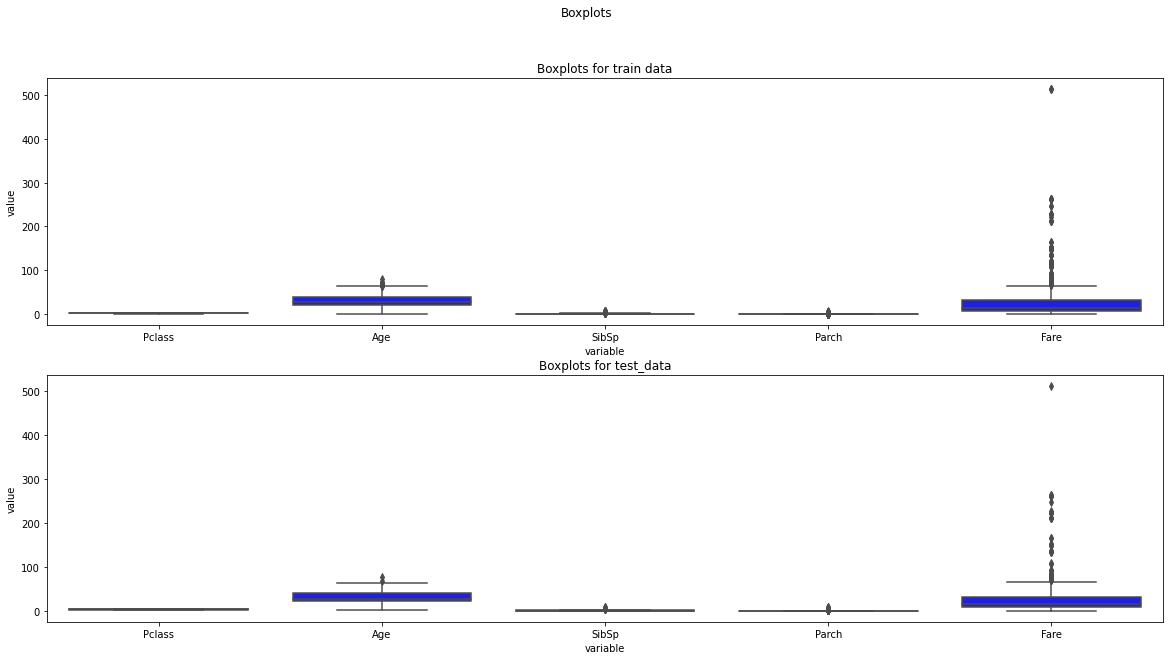

In [10]:
# Checking for Outliers
#
import seaborn as sns
import matplotlib.pyplot as plt


fig,((ax1,ax2))= plt.subplots(2,1, figsize=(20, 10))

fig.suptitle('Boxplots')

boxplot = pd.DataFrame(data =train_data, columns = [ 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare'])
boxplot1 = pd.DataFrame(data =test_data, columns = [ 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare'])


sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'blue', ax=ax1).set_title('Boxplots for train data')
sns.boxplot(x="variable", y="value", data=pd.melt(boxplot1), color = 'blue', ax=ax2).set_title('Boxplots for test_data')

plt.show()

In [11]:

# Checking for missing values 
display('Test_data dataset null values')
display(test_data.isnull().sum())

# Checking for missing values 
display('Train_data dataset null values')
display(train_data.isnull().sum())

'Test_data dataset null values'

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

'Train_data dataset null values'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Dealing  with missing values 
#Age
train_data['Age'] = train_data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
test_data['Age'] = test_data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [13]:
print(train_data.loc[train_data[ 'Embarked']. isnull()])
print(train_data.loc[train_data[ 'Cabin']== 'B78'])


     PassengerId  Survived  Pclass  ...  Fare Cabin  Embarked
61            62         1       1  ...  80.0   B28       NaN
829          830         1       1  ...  80.0   B28       NaN

[2 rows x 12 columns]
    PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
31           32         1       1  ...  146.5208   B78         C

[1 rows x 12 columns]


In [14]:
import numpy as np

#Fill the embarked column  two rows with the embrarked column in the same cabin 
train_data.Embarked = train_data.Embarked.fillna('C') 


In [15]:
# using dropna() function for the cabin column   
train_data =train_data.dropna(axis = 1)
test_data =test_data.dropna(axis = 1)


In [16]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64


In [17]:
# Checking for Anomalies for train data 
#
Q1= train_data.quantile(0.25)
Q3 =train_data.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Age             21.5000
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 0.25, dtype: float64
----------------------------------------


'0.75 quartile'

PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             36.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64
----------------------------------------


'0.5 quartile'

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             14.5000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


In [18]:
# Checking for Anomalies for test data 
#
Q1=test_data.quantile(0.25)
Q3 =test_data.quantile(0.75)
IQR = Q3-Q1
display('0.25 quartile')
print(Q1)
print('----------------------------------------')
display('0.75 quartile')
print(Q3)
print('----------------------------------------')
display('0.5 quartile')
print(IQR)

'0.25 quartile'

PassengerId    996.25
Pclass           1.00
Age             22.00
SibSp            0.00
Parch            0.00
Name: 0.25, dtype: float64
----------------------------------------


'0.75 quartile'

PassengerId    1204.750
Pclass            3.000
Age              36.375
SibSp             1.000
Parch             0.000
Name: 0.75, dtype: float64
----------------------------------------


'0.5 quartile'

PassengerId    208.500
Pclass           2.000
Age             14.375
SibSp            1.000
Parch            0.000
dtype: float64


No anomalies found 

##Exploratory Analysis 

In [79]:
display('The test_ data summary')
print(test_data.describe())
display('The train_ data summary')
train_data.describe()

'The test_ data summary'

       PassengerId      Pclass         Sex  ...       Parch    Embarked  Family_Size
count   418.000000  418.000000  418.000000  ...  418.000000  418.000000   418.000000
mean   1100.500000    2.265550    0.636364  ...    0.392344    1.401914     0.839713
std     120.810458    0.841838    0.481622  ...    0.981429    0.854496     1.519072
min     892.000000    1.000000    0.000000  ...    0.000000    0.000000     0.000000
25%     996.250000    1.000000    0.000000  ...    0.000000    1.000000     0.000000
50%    1100.500000    3.000000    1.000000  ...    0.000000    2.000000     0.000000
75%    1204.750000    3.000000    1.000000  ...    0.000000    2.000000     1.000000
max    1309.000000    3.000000    1.000000  ...    9.000000    2.000000    10.000000

[8 rows x 8 columns]


'The train_ data summary'

PassengerId    Survived      Pclass  ...        Fare    Embarked  Family_Size
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000   891.000000
mean    446.000000    0.383838    2.308642  ...   32.204208    1.531987     0.904602
std     257.353842    0.486592    0.836071  ...   49.693429    0.794531     1.613459
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000     0.000000
25%     223.500000    0.000000    2.000000  ...    7.910400    1.000000     0.000000
50%     446.000000    0.000000    3.000000  ...   14.454200    2.000000     0.000000
75%     668.500000    1.000000    3.000000  ...   31.000000    2.000000     1.000000
max     891.000000    1.000000    3.000000  ...  512.329200    2.000000    10.000000

[8 rows x 10 columns]

The mean of the age that were travelling was 29years and had a baby  who was months old on board and the oldest was 76 years 


The mean of the fare paid to travel was 49 bob and the highest fare that was paid was 512

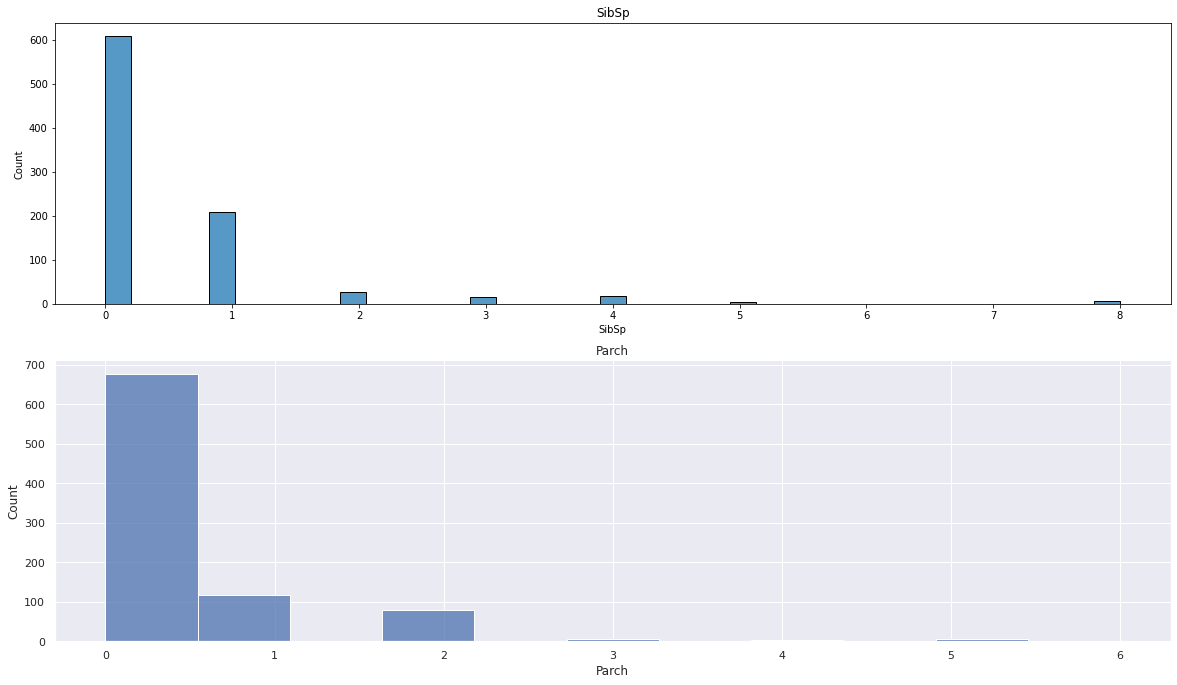

In [20]:
# Viewing the distributions of the variables using histograms
columns_dict={ 'SibSp': 1,
       'Parch' : 2}
plt.figure(figsize=(20,30) )

# make a histogram plot for each variable column
for variable,i in columns_dict.items():
 plt.subplot(5,1,i)
 sns.histplot(train_data[variable])
 sns.set(style='darkgrid')
 plt.title(variable)
plt.show()

Most people in titanic have no siblings and parents on board 

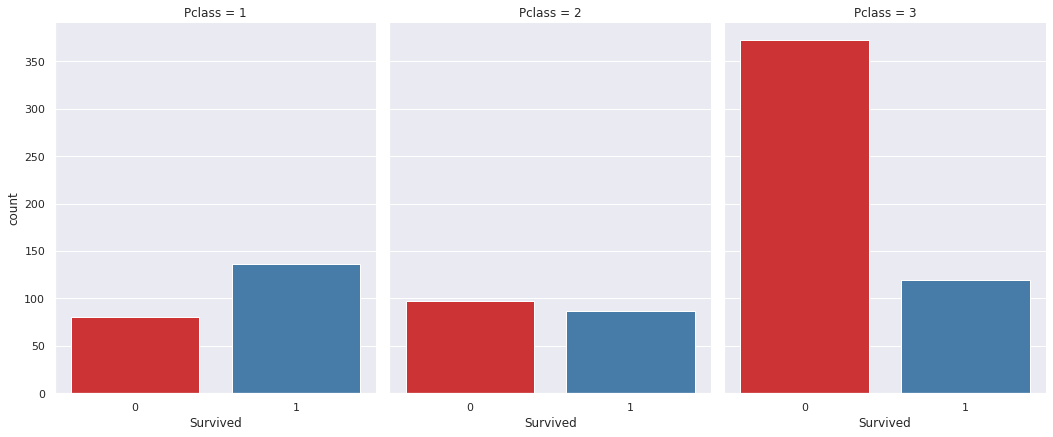

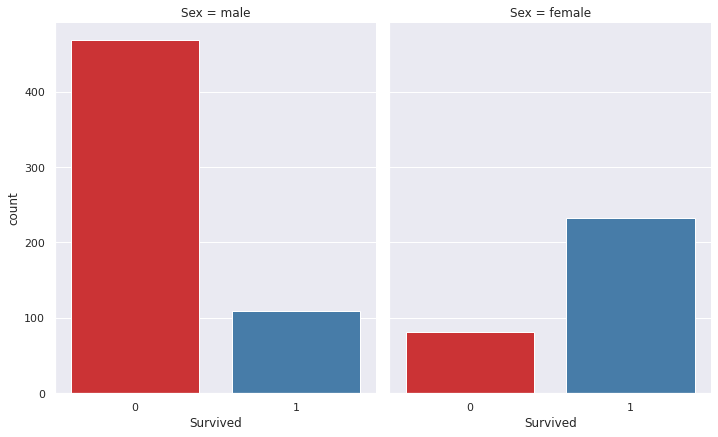

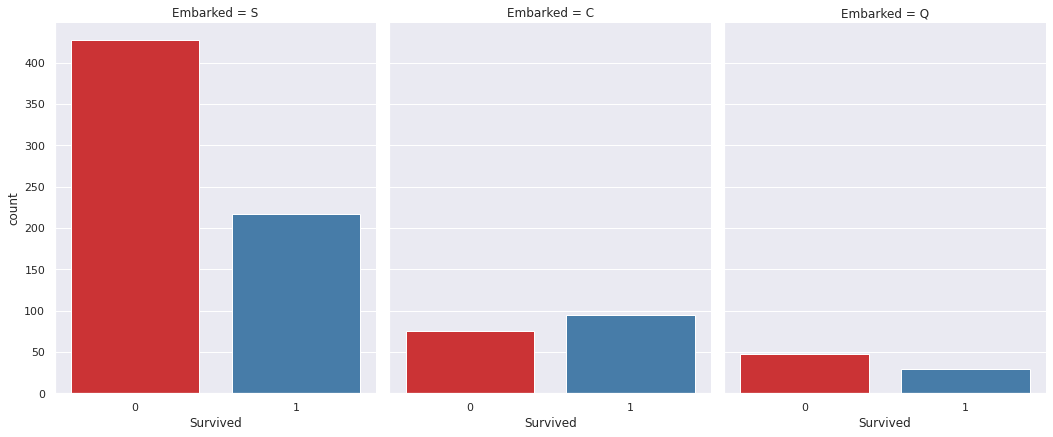

In [21]:
import warnings
warnings.filterwarnings("ignore")
sns.catplot("Survived", col="Pclass", col_wrap=4, data=train_data, kind="count", height=6, aspect=.8, palette='Set1')
sns.catplot("Survived", col="Sex", col_wrap=4, data=train_data, kind="count", height=6, aspect=.8, palette='Set1')
sns.catplot("Survived", col="Embarked", col_wrap=4, data=train_data, kind="count", height=6, aspect=.8, palette='Set1')

Male, in Pclass 3 and embarked on S had the highest numbers of people surviving 

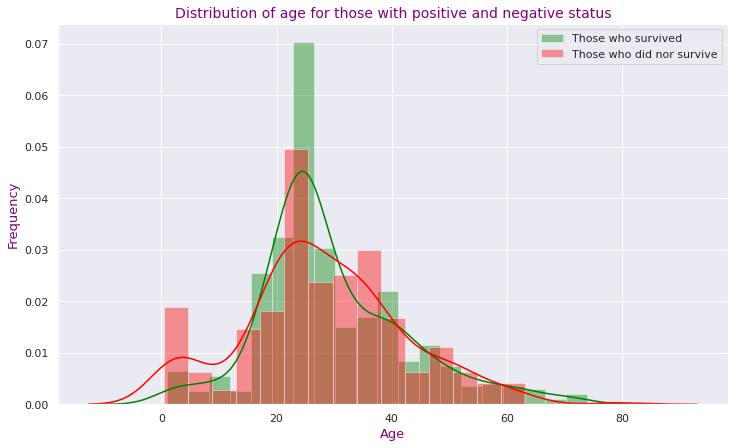

In [22]:

# Plotting histogram to show distribution of age per survived
# 
negative = train_data.loc[train_data.Survived==0, 'Age']    # Selecting only negative datapoints in the age column
positive = train_data.loc[train_data.Survived== 1, 'Age']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(negative, color="green", label="Those who survived")
sns.distplot(positive, color="red", label="Those who did nor survive")
plt.title('Distribution of age for those with positive and negative status', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

The age of those who survived and did not survive was highest around 20years and there was a normal distribution of ages 

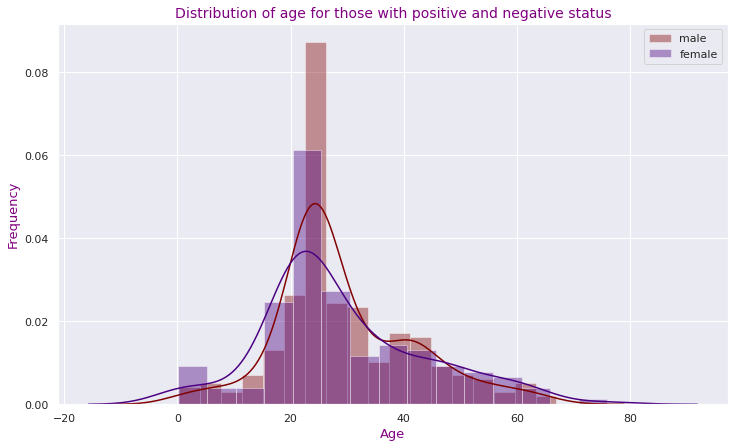

In [23]:

# Plotting histogram to show distribution of age per survived
# 
negative = test_data.loc[test_data.Sex=='male', 'Age']    # Selecting only negative datapoints in the age column
positive = test_data.loc[test_data.Sex== 'female', 'Age']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(negative, color="maroon", label="male")
sns.distplot(positive, color="indigo", label="female")
plt.title('Distribution of age for those with positive and negative status', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

The most people on board were males around 20-40 years old 

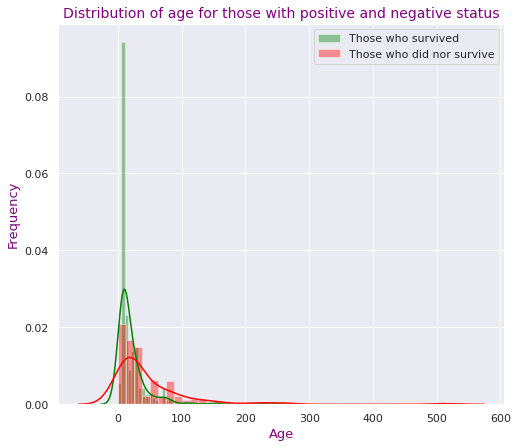

In [24]:
# Plotting histogram to show distribution of age per gender
# 
negative = train_data.loc[train_data.Survived==0, 'Fare']    # Selecting only negative datapoints in the age column
positive = train_data.loc[train_data.Survived== 1, 'Fare']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(8,7))
sns.distplot(negative, color="green", label="Those who survived")
sns.distplot(positive, color="red", label="Those who did nor survive")
plt.title('Distribution of age for those with positive and negative status', fontsize = 14, color = 'purple')
plt.xlabel('Fare', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

Most people who survived paid less fare and no one survived that had paid lots of money 

Pair plot for age and fare in train_data dataset 

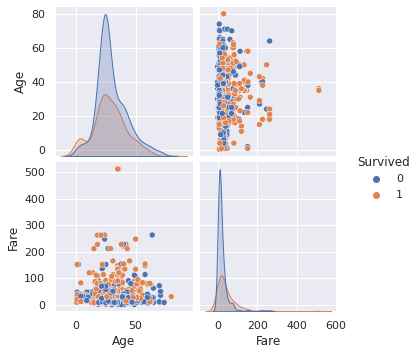

In [25]:
numerical= train_data[['Age','Fare', 'Survived']]

sns.pairplot(numerical, hue='Survived')
plt.show()

Fare and age have a normal distriution of values 

In [26]:
# To uninstall
!pip uninstall pandas_profiling

Uninstalling pandas-profiling-2.9.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-2.9.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-2.9.0


In [27]:
#Install pandas profiling 
!pip install pandas-profiling[notebook,html]


  Using cached https://files.pythonhosted.org/packages/32/79/5d03ed1172e3e67a997a6a795bcdd2ab58f84851969d01a91455383795b6/pandas_profiling-2.9.0-py2.py3-none-any.whl


In [28]:
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [29]:
ProfileReport(test_data)

In [30]:
ProfileReport(train_data)

## Feature Selection 

In [31]:
#Creating new family_size  
#from column sibsp - Number of Siblings/Spouses Aboard  
#parch - Number of Parents/Children Aboard          
train_data['Family_Size']=train_data['SibSp']+train_data['Parch']

test_data['Family_Size']=test_data['SibSp']+test_data['Parch']

In [32]:
display(train_data.head())
display(test_data.head())

PassengerId  Survived  Pclass  ...     Fare Embarked  Family_Size
0            1         0       3  ...   7.2500        S            1
1            2         1       1  ...  71.2833        C            1
2            3         1       3  ...   7.9250        S            0
3            4         1       1  ...  53.1000        S            1
4            5         0       3  ...   8.0500        S            0

[5 rows x 12 columns]

PassengerId  Pclass  ... Embarked Family_Size
0          892       3  ...        Q           0
1          893       3  ...        S           1
2          894       2  ...        Q           0
3          895       3  ...        S           0
4          896       3  ...        S           2

[5 rows x 10 columns]

In [33]:
# Categorical columns list 
cat_cols = ['Sex', 'Embarked']
  
# Using a for loop to change columns to their appriopriate datatypes
#
for column in test_data.columns:
    if column in cat_cols:
     test_data[column] = test_data[column].astype('category').cat.codes
for column in train_data.columns:
    if column in cat_cols:  

     train_data[column] = train_data[column].astype('category').cat.codes

In [34]:
display(train_data.head())
display(test_data.head())

PassengerId  Survived  Pclass  ...     Fare  Embarked  Family_Size
0            1         0       3  ...   7.2500         2            1
1            2         1       1  ...  71.2833         0            1
2            3         1       3  ...   7.9250         2            0
3            4         1       1  ...  53.1000         2            1
4            5         0       3  ...   8.0500         2            0

[5 rows x 12 columns]

PassengerId  Pclass  ... Embarked  Family_Size
0          892       3  ...        1            0
1          893       3  ...        2            1
2          894       2  ...        1            0
3          895       3  ...        2            0
4          896       3  ...        2            2

[5 rows x 10 columns]

In [35]:
#Build a nice model for KNN neighbors 
reports= ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare']
report= ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket']
test_data_model =test_data.drop(report, axis=1)
train_data_model =train_data.drop(reports, axis=1)

In [36]:
display(train_data_model.head())
display(test_data_model.head())

Survived  Pclass  Sex   Age  Embarked  Family_Size
0         0       3    1  22.0         2            1
1         1       1    0  38.0         0            1
2         1       3    0  26.0         2            0
3         1       1    0  35.0         2            1
4         0       3    1  35.0         2            0

Pclass  Sex   Age  Embarked  Family_Size
0       3    1  34.5         1            0
1       3    0  47.0         2            1
2       2    1  62.0         1            0
3       3    1  27.0         2            0
4       3    0  22.0         2            2

# Implementing the solution 

In [38]:
# Defining our features and target variable
# Our task is to Predict the people who survived based on the given traits
X = train_data_model.iloc[:, 1:].values
y= train_data_model['Survived']

In [39]:
# Loading the libraries 
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

##80-20 sample 

In [40]:
# Splitting the data into training and testing sets
#Making sure the data is stratified as it is unbalanced 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, stratify= train_data['Survived'])

In [41]:
# Initialising the KNeighbours Calssifier 
k_classifier = KNeighborsClassifier(5)

# Training the model
k_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = k_classifier.predict(X_test)


In [42]:
#Finding the accuracy of the data 
print("Accuracy score : ",  metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Classification Report::", metrics.classification_report(y_test, y_pred))

Accuracy score :  0.7597765363128491
F1 Score: 0.6446280991735538
Classification Report::               precision    recall  f1-score   support

           0       0.76      0.88      0.82       110
           1       0.75      0.57      0.64        69

    accuracy                           0.76       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.76      0.75       179



In [43]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[97, 13],
       [30, 39]])

The 80-20 set has an accuracy score 75.9% . The f1 score (The haromonic mean of precision and accuracy was 64%). The model was able to correctly predict 97 people who survived and 39 who did not survive out of the 179 sample. 

**Validate the data by checking the accuracy of the prediction model when you load the new data** 

In [44]:
#Checking for the size of the data so as to have a sample 
n = y_pred.size

In [45]:
#sampling the test_data dataset 
X_model = test_data_model.sample(n = n, random_state=5)

In [46]:
#Predicting the target variable on the test_data dataset  
y_pred_model= k_classifier.predict(X_model)


In [47]:
# Finding the accuracy of model
print("Accuracy score : ",  metrics.accuracy_score(y_pred_model, y_pred))
print("F1 Score:", metrics.f1_score(y_pred_model, y_pred))
print("Classification Report::", metrics.classification_report(y_pred_model, y_pred))

Accuracy score :  0.5642458100558659
F1 Score: 0.3157894736842105
Classification Report::               precision    recall  f1-score   support

           0       0.65      0.71      0.68       117
           1       0.35      0.29      0.32        62

    accuracy                           0.56       179
   macro avg       0.50      0.50      0.50       179
weighted avg       0.55      0.56      0.55       179



In [48]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_model, y_test)

array([[72, 45],
       [38, 24]])

When you introduce a new_dataset


The 80-20 set has an accuracy score 56.4% . The f1 score (The haromonic mean of precision and accuracy) was 31.5%. The model was able to predict 72 people who 
survived and 24 who did not survive out of the 179 sample. 

##70-30 data 

Splitting the data to 70-30 set

In [49]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.3, random_state=0, stratify= train_data['Survived'])

In [50]:
# Training the model
k_classifier.fit(X1_train, y1_train)

# Running the prediction
y_pred1 = k_classifier.predict(X1_test)

In [51]:
#Finding the accuracy of the data 
print("Accuracy score : ",  metrics.accuracy_score(y1_test, y_pred1))
print("F1 Score:", metrics.f1_score(y1_test, y_pred1))
print("Classification Report::", metrics.classification_report(y1_test, y_pred1))

Accuracy score :  0.7761194029850746
F1 Score: 0.6703296703296703
Classification Report::               precision    recall  f1-score   support

           0       0.78      0.89      0.83       165
           1       0.77      0.59      0.67       103

    accuracy                           0.78       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.78      0.78      0.77       268



In [52]:
# Constructing the confusion matrix.

confusion_matrix(y1_test, y_pred1)

array([[147,  18],
       [ 42,  61]])

The 70-30 set has an accuracy score 77.6% . The f1 score (The haromonic mean of precision and accuracy was 67%). The model was able to predict 147 people who survived and 61 who did not survive. 

**Validate the data by checking the accuracy of the prediction model when you load the new data** 

In [53]:
#Checking for the size of the data so as to have a sample 
n1 = y_pred1.size

In [54]:
#sampling the test_data dataset 
X1_model = test_data_model.sample(n = n1, random_state=5)

In [55]:
#Predicting the target variable on the test_data dataset  
y_pred_model1= k_classifier.predict(X1_model)

In [56]:
#Finding the accuracy of the data 
print("Accuracy score : ",  metrics.accuracy_score(y_pred_model1, y_pred1))
print("F1 Score:", metrics.f1_score(y_pred_model1, y_pred1))
print("Classification Report::", metrics.classification_report(y_pred_model1, y_pred1))

Accuracy score :  0.5746268656716418
F1 Score: 0.3666666666666667
Classification Report::               precision    recall  f1-score   support

           0       0.64      0.72      0.68       167
           1       0.42      0.33      0.37       101

    accuracy                           0.57       268
   macro avg       0.53      0.53      0.52       268
weighted avg       0.56      0.57      0.56       268



In [57]:
# Constructing the confusion matrix.

confusion_matrix(y_pred_model1, y_pred1)

array([[121,  46],
       [ 68,  33]])

In a new dataset 

The 70-30 set has an accuracy score 57% . The f1 score (The haromonic mean of precision and accuracy was 37%). The model was able to predict 121 people who survived and 33 who did not survive out of the 268 sample. 

##60-40 set

In [58]:
#Splitting the data 
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.4, random_state=0, stratify= train_data['Survived'])

In [59]:
# Training the model
k_classifier.fit(X2_train, y2_train)

# Running the prediction
y_pred2 = k_classifier.predict(X2_test)

In [60]:
#Finding the accuracy of the data 
print("Accuracy score : ",  metrics.accuracy_score(y2_test, y_pred2))
print("F1 Score:", metrics.f1_score(y2_test, y_pred2))
print("Classification Report::", metrics.classification_report(y2_test, y_pred2))

Accuracy score :  0.7703081232492998
F1 Score: 0.6525423728813559
Classification Report::               precision    recall  f1-score   support

           0       0.77      0.90      0.83       220
           1       0.78      0.56      0.65       137

    accuracy                           0.77       357
   macro avg       0.77      0.73      0.74       357
weighted avg       0.77      0.77      0.76       357



In [61]:
# Constructing the confusion matrix.

confusion_matrix(y2_test, y_pred2)

array([[198,  22],
       [ 60,  77]])

The 60-40 set has an accuracy score 77.03% . The f1 score (The haromonic mean of precision and accuracy was 65%). The model was able to predict 198 people who survived and 77 who did not survive out of 355. 

**Validate the data by checking the accuracy of the prediction model when you load the new data**

In [62]:
#Checking for the size of the data so as to have a sample 
n2 = y_pred2.size

In [63]:
#sampling the test_data dataset 
X2_model = test_data_model.sample(n = n2, random_state=5)

In [64]:
#Predicting the target variable on the test_data dataset  
y_pred_model2= k_classifier.predict(X2_model)

In [65]:
#Finding the accuracy of the data 
print("Accuracy score : ",  metrics.accuracy_score(y_pred_model2, y_pred2))
print("F1 Score:", metrics.f1_score(y_pred_model2, y_pred2))
print("Classification Report::", metrics.classification_report(y_pred_model2, y_pred2))

Accuracy score :  0.5742296918767507
F1 Score: 0.28301886792452835
Classification Report::               precision    recall  f1-score   support

           0       0.68      0.72      0.70       244
           1       0.30      0.27      0.28       113

    accuracy                           0.57       357
   macro avg       0.49      0.49      0.49       357
weighted avg       0.56      0.57      0.57       357



In [66]:
confusion_matrix(y_pred_model2, y_pred2)

array([[175,  69],
       [ 83,  30]])

in a new dataset


The 60-40 set has an accuracy score 57% . The f1 score (The haromonic mean of precision and accuracy) was 28%. The model was able to correctly predict 175 people who survived and 30 who did not survive from 357 sample. 



> **In conclusion the 70-30 set performed best though its accuracy and F1 score difference from the other sets is low**








# Challenging the solution 

Trying to Improve the performance of model 

In [67]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# Another parameter besides k that we might vary is the algorithm parameters which are used to compute the nearest neighbors:
# default options --> auto 
# another option --> ball_tree 
# another option --> kd_tree 

# we create a list
weight_options = ['uniform', 'distance']
algorithm_option = ['auto', 'ball_tree', 'kd_tree']
leaf_size_option = list(range(20, 40))

In [68]:
# Create a parameter grid 
param_grid = dict(n_neighbors=k_range, weights=weight_options, algorithm=algorithm_option, leaf_size= leaf_size_option )

In [69]:
# specipy the knn neighbours for grid 
knn = KNeighborsClassifier(n_neighbors=k)

In [70]:
#Import grid search and search for the best parameters 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                       30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=Tr

In [71]:
print(grid.best_score_)
print(grid.best_params_)


0.7528258064516129
{'algorithm': 'ball_tree', 'leaf_size': 32, 'n_neighbors': 9, 'weights': 'distance'}


In [72]:
#Splitting the data 
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.3, random_state=0, stratify= train_data['Survived'])

In [73]:
# Initialising the KNeighbours Calssifier  with optimized options 
clf = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 32, n_neighbors= 9, weights= 'distance' )

In [74]:
# Training the model
clf.fit(X3_train, y3_train)

# Running the prediction
y_pred_imp = clf.predict(X3_test)

In [75]:
#Finding the accuracy of the data 
print("Accuracy score : ",  metrics.accuracy_score(y3_test, y_pred_imp))
print("F1 Score:", metrics.f1_score(y3_test, y_pred_imp))
print("Classification Report::", metrics.classification_report(y3_test ,y_pred_imp))

Accuracy score :  0.7835820895522388
F1 Score: 0.6704545454545455
Classification Report::               precision    recall  f1-score   support

           0       0.77      0.92      0.84       165
           1       0.81      0.57      0.67       103

    accuracy                           0.78       268
   macro avg       0.79      0.74      0.75       268
weighted avg       0.79      0.78      0.77       268



**validating the external data to work well on the data**

In [76]:
#Checking for the size of the data so as to have a sample 
n3 = y_pred_imp.size
#sampling the test_data dataset 
X3_model = test_data_model.sample(n = n3, random_state=5)
#Predicting the target variable on the test_data dataset  
y_pred_model3= clf.predict(X3_model)

In [77]:
#Finding the accuracy of the data 
print("Accuracy score : ",  metrics.accuracy_score(y_pred_model3, y_pred_imp))
print("F1 Score:", metrics.f1_score(y_pred_model3, y_pred_imp))
print("Classification Report::", metrics.classification_report(y_pred_model3 ,y_pred_imp))

Accuracy score :  0.5970149253731343
F1 Score: 0.30769230769230765
Classification Report::               precision    recall  f1-score   support

           0       0.70      0.74      0.72       185
           1       0.33      0.29      0.31        83

    accuracy                           0.60       268
   macro avg       0.51      0.51      0.51       268
weighted avg       0.58      0.60      0.59       268



In [78]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_model3 ,y_pred_imp)

array([[136,  49],
       [ 59,  24]])

**There is a 1% improvement on the accuracy and f1 score from the trained data without optimization on the data. The optimization did not do much work**

#Follow up questions 

Does Knn neighbours classifer give the best accuracy for classification ? 
 
 
 Can other tools such as GradientBoostingClassifier, DecisionTreeClassifier, naive_bayes,  XGBClassifier, and LogisticRegression predict better?